### Maggio 2021: Tesla sospende i pagamenti in Bitcoin

Cosa è successo? A marzo 2021, Tesla aveva annunciato che avrebbe accettato Bitcoin come metodo di pagamento per le sue auto, portando entusiasmo nel mercato e un aumento del valore del Bitcoin. Tuttavia, a maggio 2021, Musk ha fatto dietrofront, annunciando che Tesla avrebbe sospeso i pagamenti in Bitcoin. Il motivo principale fornito era l'impatto ambientale derivante dal mining di Bitcoin, che richiede grandi quantità di energia, spesso generata da combustibili fossili.

Effetto sul mercato: Dopo questo annuncio, il prezzo di Bitcoin è precipitato di oltre il 10% in poche ore, passando da circa

47.000. Nei giorni successivi, la caduta è proseguita, spingendo il prezzo ancora più in basso.

Tweet chiave: Musk ha twittato: "Tesla has suspended vehicle purchases using Bitcoin. We are concerned about rapidly increasing use of fossil fuels for Bitcoin mining and transactions, especially coal, which has the worst emissions of any fuel."

/var/folders/3n/vf15kv6n675_m6mzk8p8rfxr0000gn/T/ipykernel_43266/184157428.py:7: FutureWarning:

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.

/var/folders/3n/vf15kv6n675_m6mzk8p8rfxr0000gn/T/ipykernel_43266/184157428.py:7: FutureWarning:

The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.



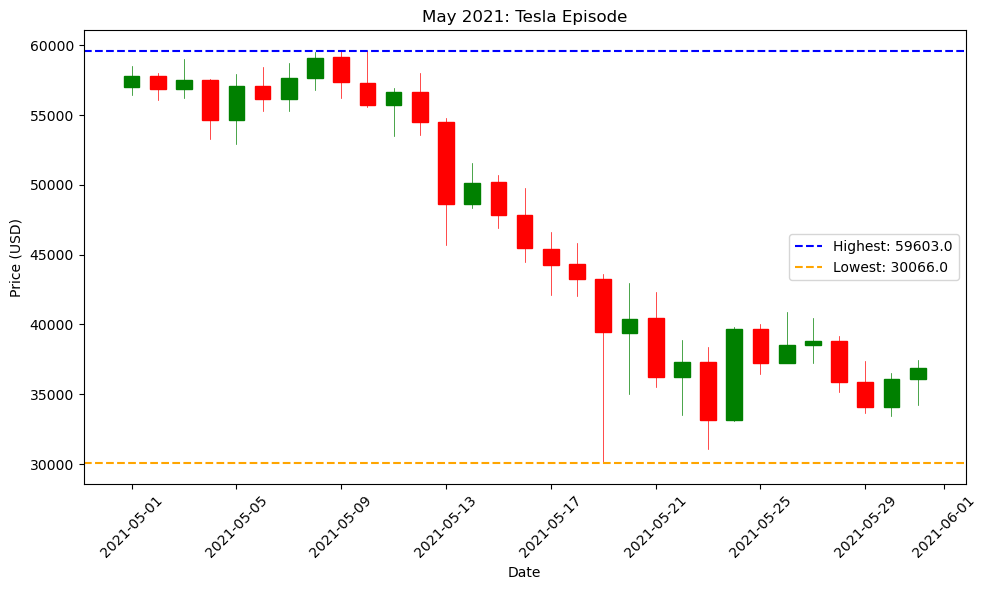

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates

# Caricare il dataset da un file CSV
bitcoin_df = pd.read_csv('data/btc_prices_2021.csv', parse_dates=['Timestamp'], date_parser=lambda x: pd.to_datetime(x, unit='s'))

# Impostare l'intervallo di date
start_date = '2021-05-01'
end_date = '2021-05-31'

# Filtrare il DataFrame per l'intervallo di date
filtered_df = bitcoin_df.set_index('Timestamp').loc[start_date:end_date]

# Risample il DataFrame a intervalli di un giorno
resampled_df = filtered_df.resample('D').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'}).dropna()

# Preparare i dati per il candlestick chart
resampled_df['Date'] = resampled_df.index.map(mdates.date2num)
ohlc_data = resampled_df[['Date', 'Open', 'High', 'Low', 'Close']].reset_index(drop=True).values

# Trova i valori massimo e minimo
highest_value = resampled_df['High'].max()
lowest_value = resampled_df['Low'].min()

# Creare il plot
fig, ax = plt.subplots(figsize=(10, 6))

# Configurare il candlestick chart
candlestick_ohlc(ax, ohlc_data, width=0.6, colorup='green', colordown='red')

# Aggiungere linee orizzontali per il valore massimo e minimo
ax.axhline(highest_value, color='green', linestyle='--', label=f'Highest: {highest_value}')
ax.axhline(lowest_value, color='red', linestyle='--', label=f'Lowest: {lowest_value}')

# Formattare l'asse delle date
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Aggiungere titolo, etichette e legenda
ax.set_title('May 2021: Tesla Episode')
ax.set_ylabel('Price (USD)')
ax.set_xlabel('Date')
ax.legend()

# Mostrare il grafico
plt.tight_layout()
plt.show()